### Exploratory Data Analysis and Model Building - Bank Marketing Campaign.

#### Data Description.

This is the classic marketing bank dataset gives us information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

#### What is a Term Deposit?

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. 

#### Feature.

- age :(numeric) age in years
- job : type of job
- marital : marital status 
   
- education : education background
- default : has credit in default?
- balance : average yearly balance, in euros (numeric) 
- housing : has housing loan?
- loan : has personal loan?

   related with the last contact of the current campaign:
   
- contact : contact communication type 
- day : last contact day of the month (numeric)
- month : last contact month of year 
- duration : last contact duration, in seconds (numeric)
   
   other attributes :
   
- campaign : number of contacts performed during this campaign and for this client
- pdays: number of days that passed by after the client was last contacted from a previous campaign  
- previous : number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign
                 
  Output(Target) variable (desired target):
- y(deposite) : has the client subscribed a term deposit? (binary: "yes","no")

#### Problem Statement.

- Predict if the client will subscribe to a term deposit based on the analysis of the marketing         campaigns the bank performed.
  
- The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Importing Required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

### Loading Dataset.

In [2]:
# Create DataFrame to read the dataset.
df = pd.read_csv("Bank_Deposit.csv")
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Data Explore.

In [3]:
# Check the number of rows and columns in DataFrame.
df.shape

(45211, 18)

In [4]:
# Check the DataFrame Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   job         45211 non-null  object
 3   marital     45211 non-null  object
 4   education   45211 non-null  object
 5   default     45211 non-null  object
 6   balance     45211 non-null  int64 
 7   housing     45211 non-null  object
 8   loan        45211 non-null  object
 9   contact     45211 non-null  object
 10  day         45211 non-null  int64 
 11  month       45211 non-null  object
 12  duration    45211 non-null  int64 
 13  campaign    45211 non-null  int64 
 14  pdays       45211 non-null  int64 
 15  previous    45211 non-null  int64 
 16  poutcome    45211 non-null  object
 17  y           45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [5]:
# Describe Numerical Features
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Here Describe function Summarizes the categorical features.
df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [7]:
# Renaming Target Variable.
df.rename({"y":"deposit"},axis=1,inplace=True)

In [8]:
# Checking Unique Values In Categorical Features.
for i in df.columns:
    if df[i].dtypes=="object":
        print(i)
        print(df[i].unique())
        print("*"*75)

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
***************************************************************************
marital
['married' 'single' 'divorced']
***************************************************************************
education
['tertiary' 'secondary' 'unknown' 'primary']
***************************************************************************
default
['no' 'yes']
***************************************************************************
housing
['yes' 'no']
***************************************************************************
loan
['no' 'yes']
***************************************************************************
contact
['unknown' 'cellular' 'telephone']
***************************************************************************
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
************************************

In [9]:
# Checking Value Counts In Categorical Features.
for i in df.columns:
    if df[i].dtypes=="object":
        print(i)
        print(df[i].value_counts())
        print("*"*75)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
***************************************************************************
marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
***************************************************************************
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
***************************************************************************
default
no     44396
yes      815
Name: default, dtype: int64
***************************************************************************
housing
yes    25130
no     20081
Name: housing, dtype: int64
**************************************************************************

In [10]:
# Checking Duplicated Observations.
df.duplicated().sum()

0

## Exploratory Data Analysis.

#### 1. Find Unwanted Columns.

In [11]:
df = df.drop("Unnamed: 0", axis=1)

 There is Unwanted Column In Dataset So We removed It.

#### 2. Find Missing Values.

In [12]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There Is No Missing Values In Dataset.

#### 3. Find Features with one value.

In [13]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
deposit         2
dtype: int64

No feature with only one value

#### 4. Explore the Categorical Features.

In [14]:
categorical = [i for i in df.columns if ((df[i].dtypes=="object") & (i not in ["deposit"]))]
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

- There are 9 categorical features.
- Feature job and month has highest number of categorical values.

#### 5. Find Categorical Feature Distribution.

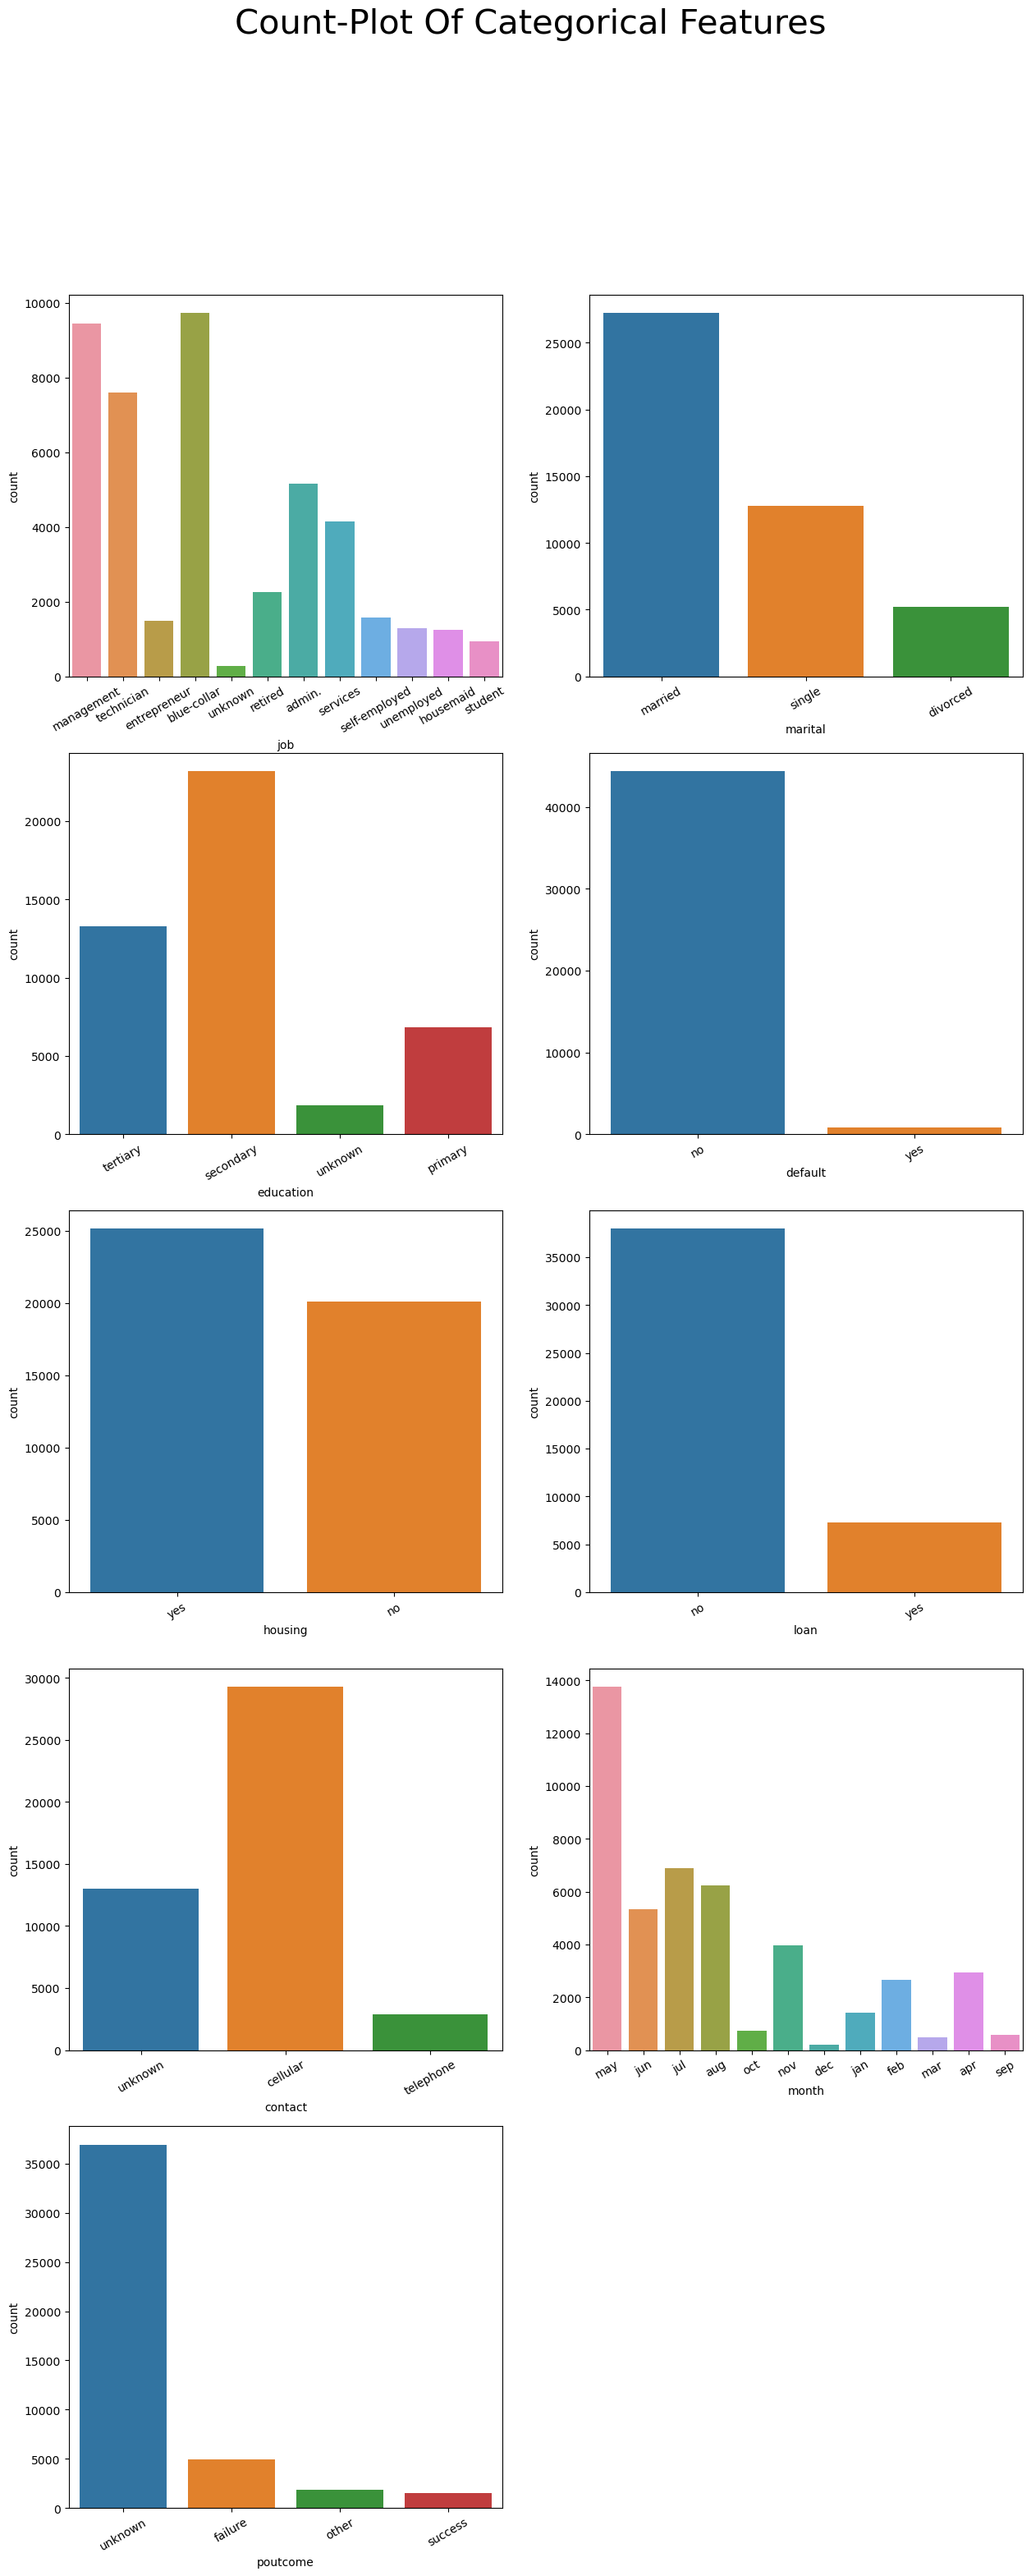

In [15]:
plt.figure(figsize=(15,35))
for i,col in enumerate(categorical,1):
    plt.subplot(5,2,i)
    sns.countplot(df[col])
    plt.xticks(rotation=30)
plt.suptitle("Count-Plot Of Categorical Features", fontsize=30)
plt.show()

- client with job type as management and blue-collar records are high in given dataset and housemaid     are very less.
- client who married are high in records in given dataset and divorced are less.
- client whoes education background is secondary are in high numbers in given dataset.
- defualt feature seems to be does not play important role as it has value of no at high ratio to       value yes which can drop.
- data in month of may is high and less in dec.

#### 6. Relationship between Categorical Features and Target Feature.

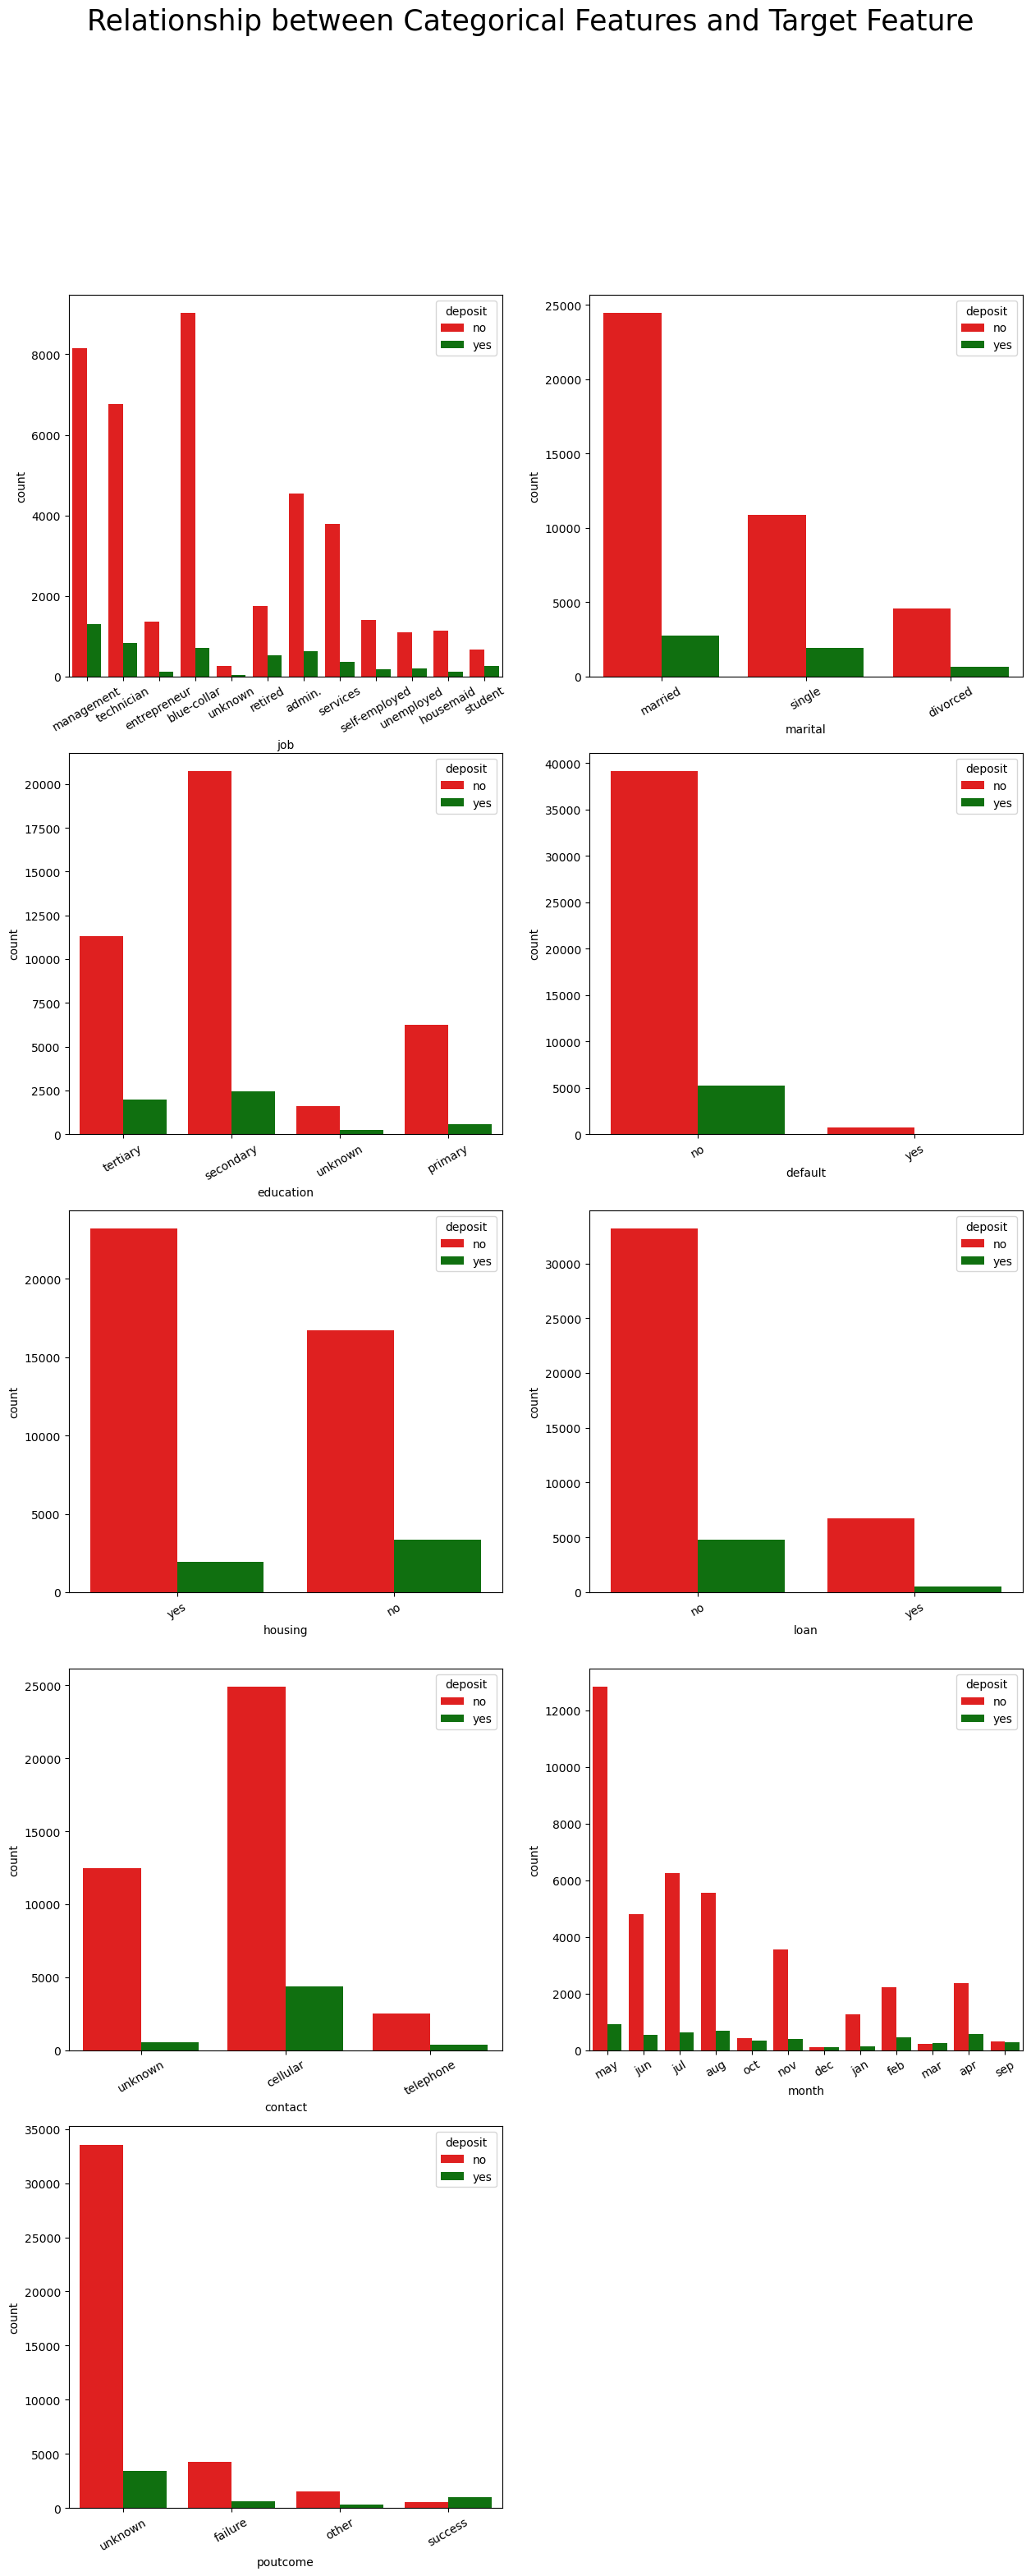

In [16]:
color = ["red","green"]
plt.figure(figsize=(15,35))
for i,col in enumerate(categorical,1):
    plt.subplot(5,2,i)
    sns.countplot(df[col],hue=df["deposit"],palette=color)
    plt.xticks(rotation=30)
plt.suptitle("Relationship between Categorical Features and Target Feature", fontsize=25)
plt.show()

#### 7. Explore the Numerical Feature.

In [17]:
Numerical = [i for i in df.columns if ((df[i].dtypes!="object") & (i not in ["deposit"]))]
Numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

There Are 7 Numerical Features.

#### 8. Find Discrete Numerical Features.

In [18]:
discrete = [i for i in Numerical if len(df[i].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete)))

Discrete Variables Count: 0


There is no Discrete Variables in give dataset.

#### 9. Find Continuous Numerical Features.

In [19]:
Continuous = [i for i in Numerical if i not in discrete+['deposit']]
print("Continuous feature Count {}".format(len(Continuous)))

Continuous feature Count 7


There are 7 Continuous Numerical features.

#### 10. Distribution of Continuous Numerical Features.

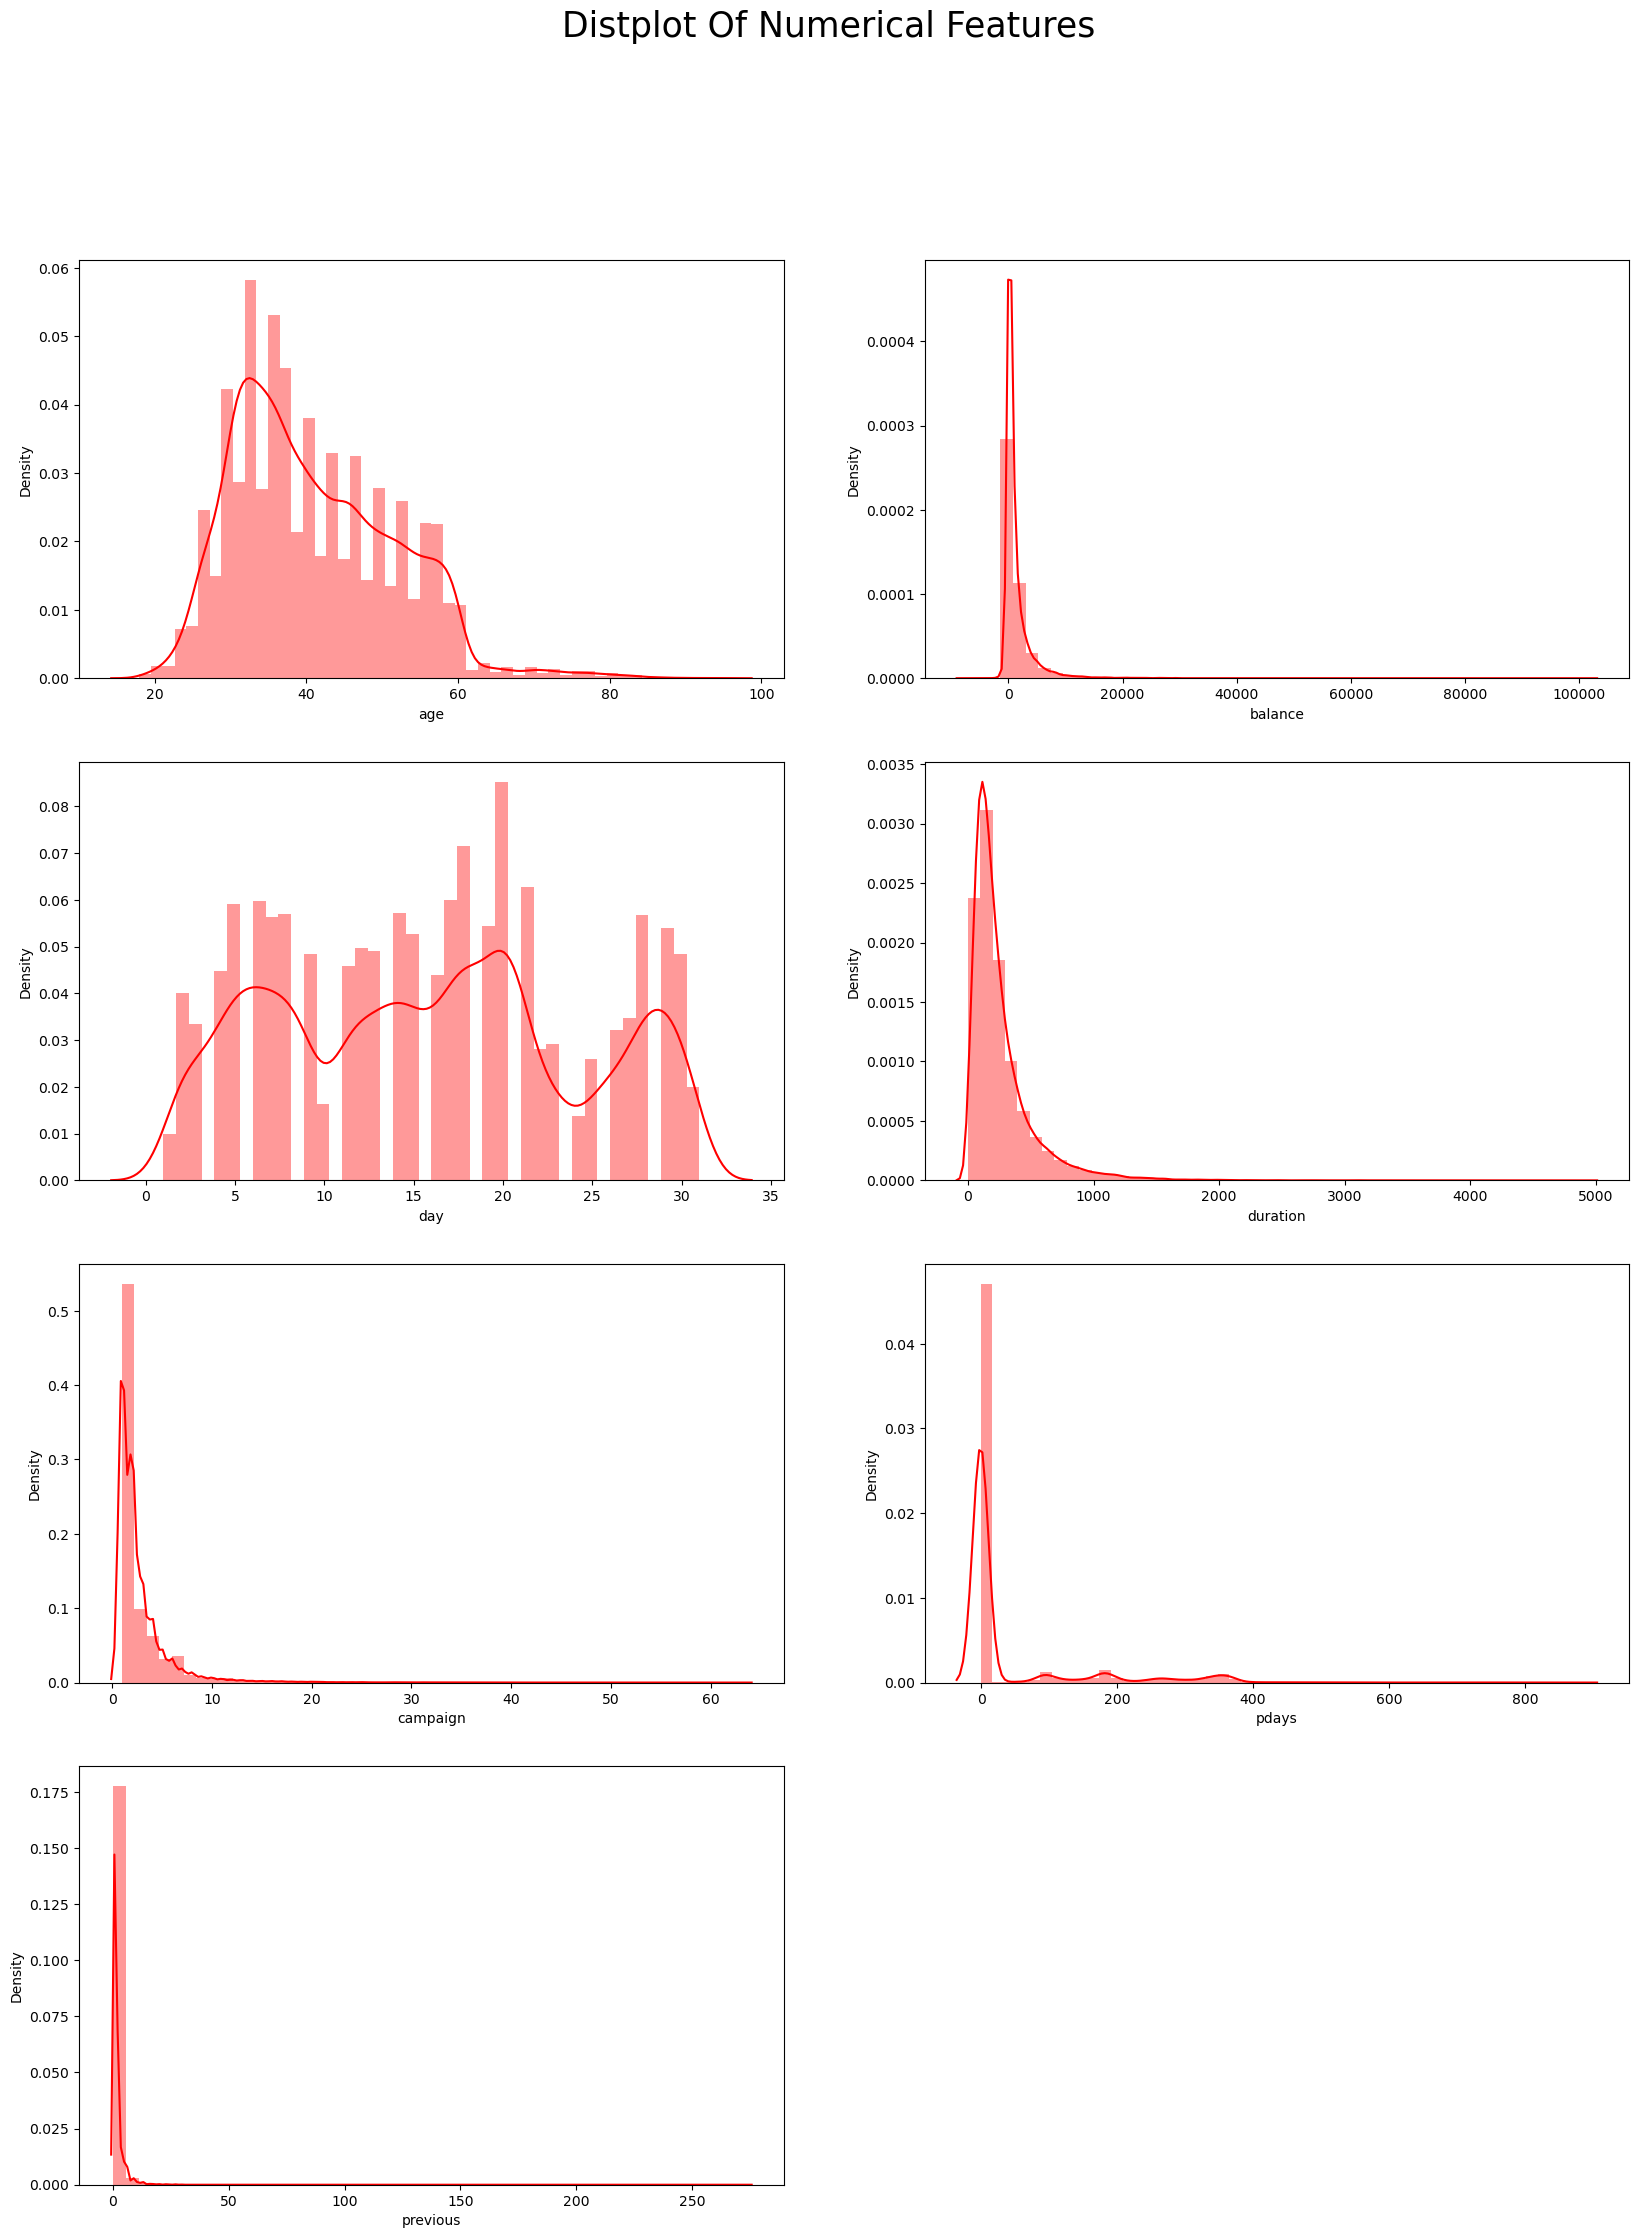

In [20]:
# Plot a univariate distribution of Continuous Features. 
plt.figure(figsize=(20,25))
for i,col in enumerate(Numerical,1):
    plt.subplot(4,2,i)
    sns.distplot(df[col],color="r")
plt.suptitle("Distplot Of Numerical Features", fontsize=25)
plt.show()

#### 11. Relation between Continous numerical Features and Labels.

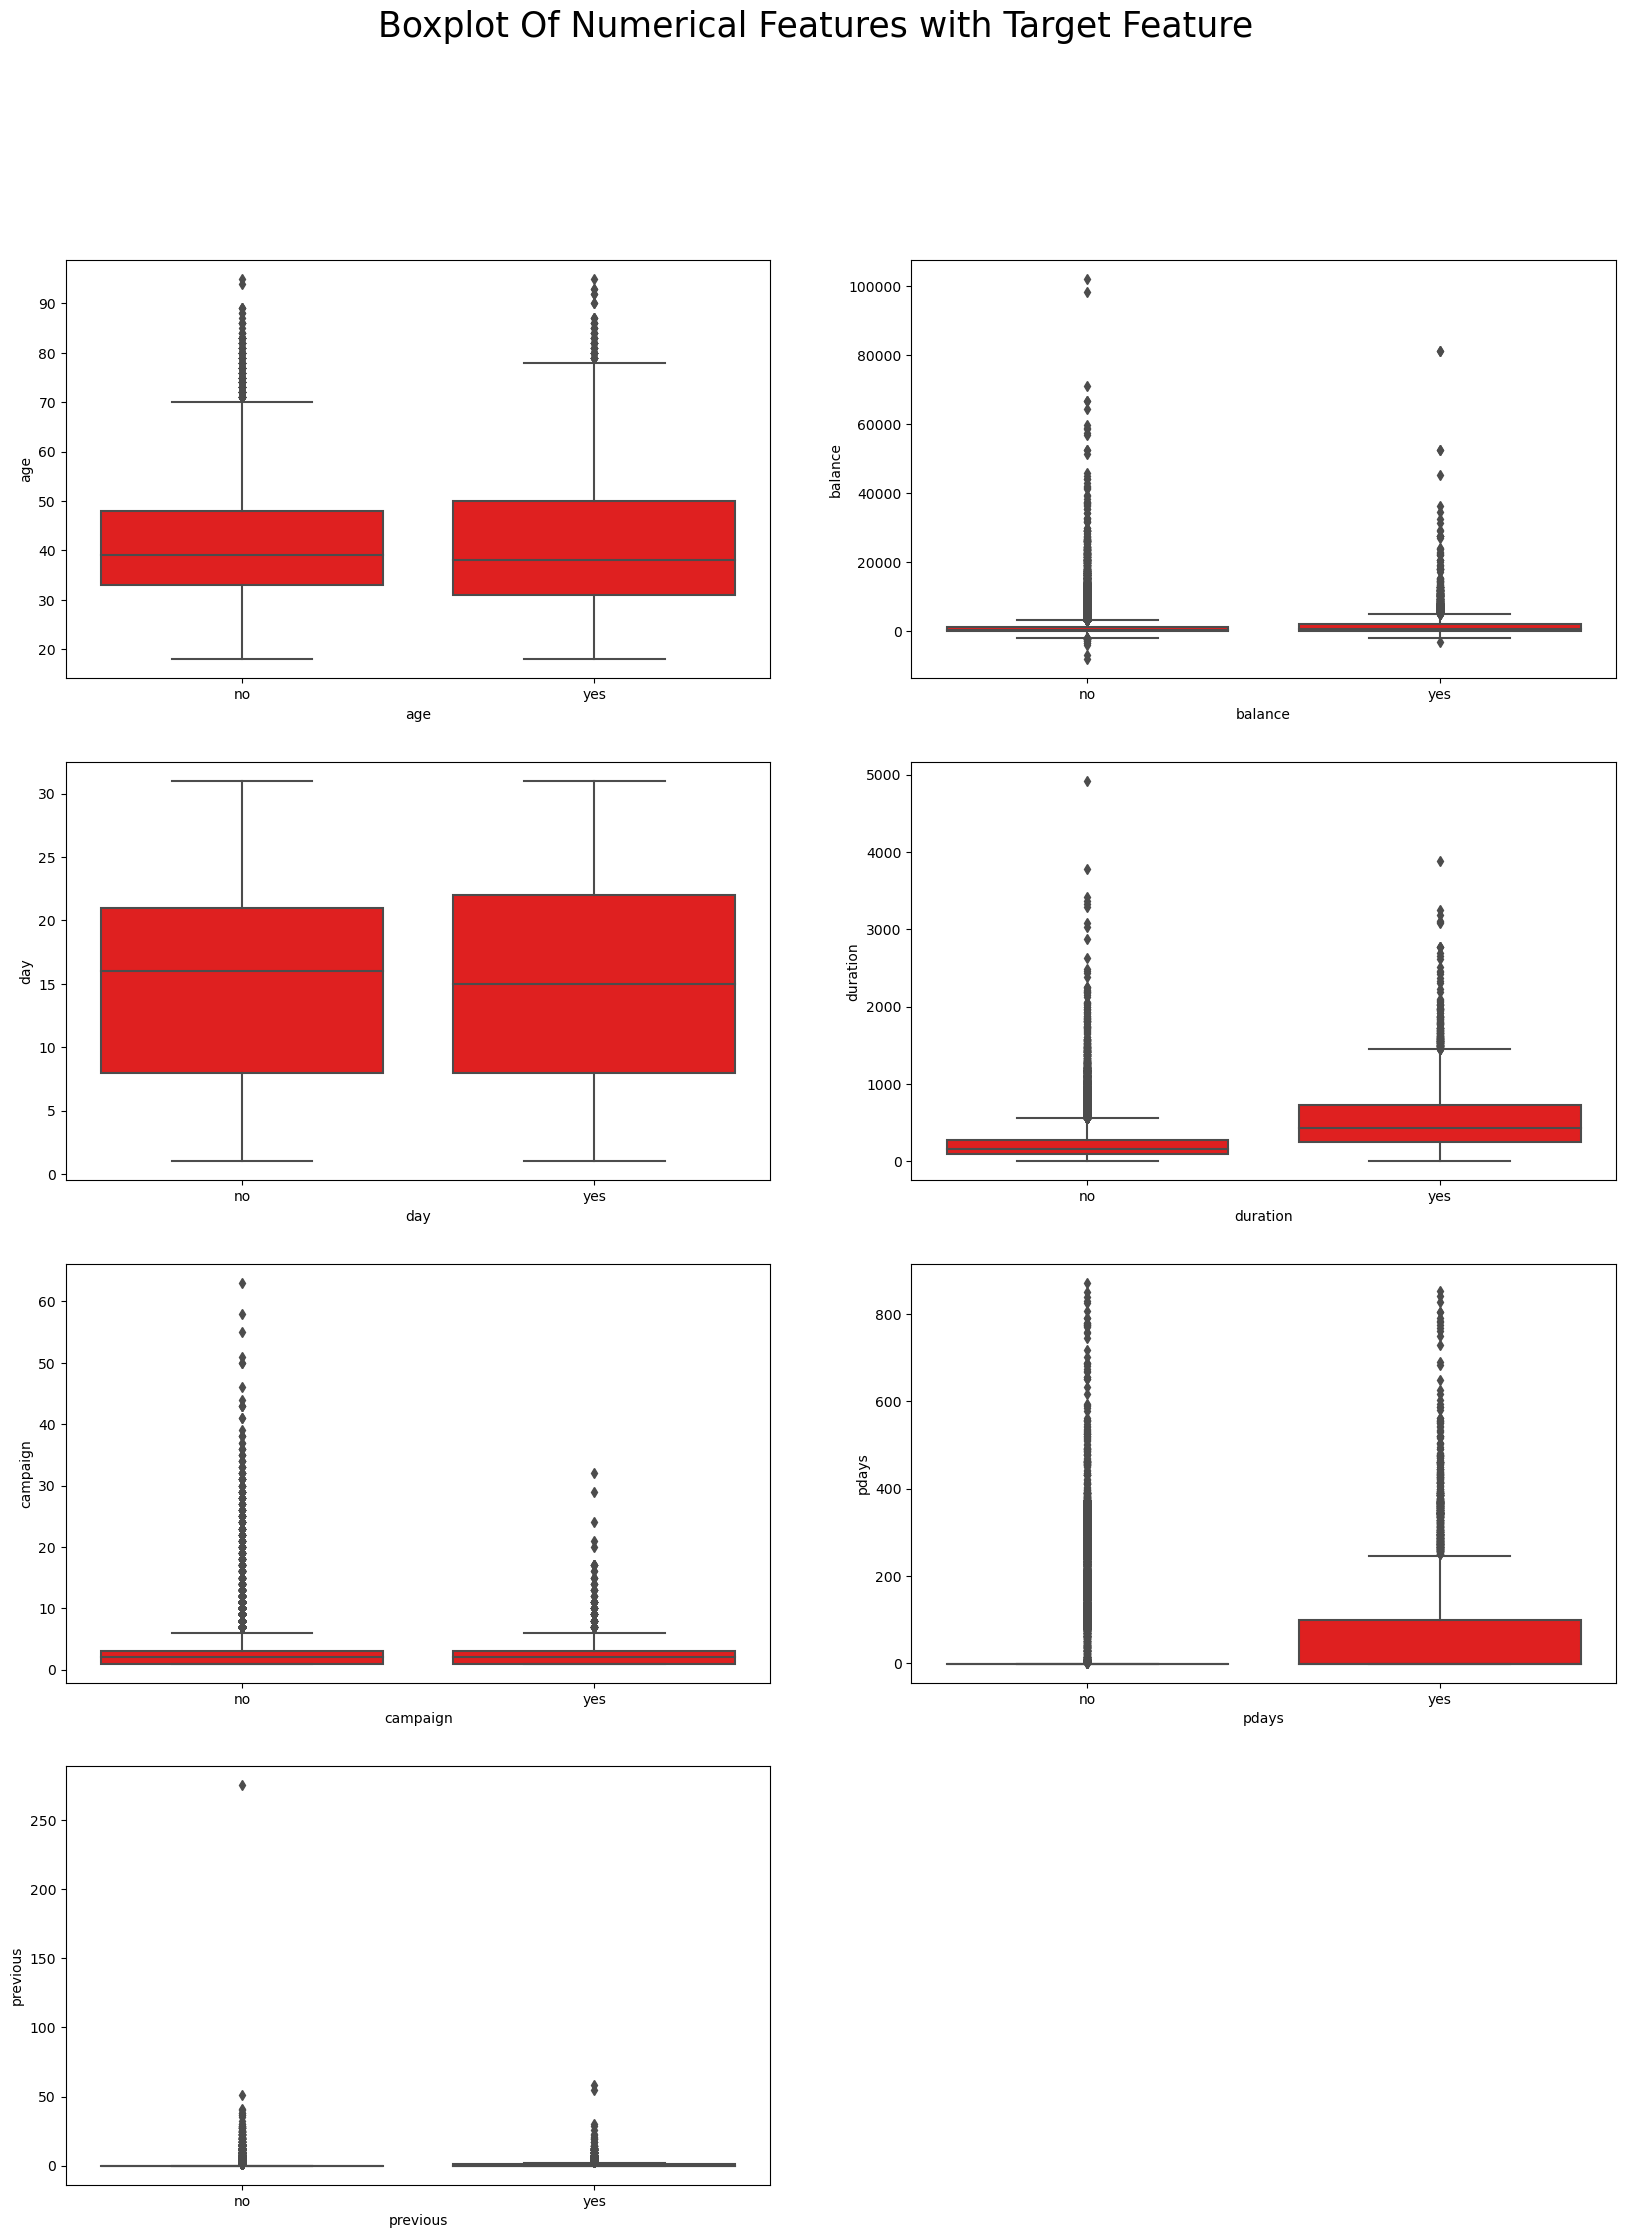

In [21]:
# Boxplot to show target distribution with respect Numerical Features.
plt.figure(figsize=(20,25))
for i,col in enumerate(Numerical,1):
    plt.subplot(4,2,i)
    sns.boxplot(x=df["deposit"], y=df[col], data=df, color="r")
    plt.xlabel(col)
plt.suptitle("Boxplot Of Numerical Features with Target Feature", fontsize=25)
plt.show()

- Client shows interest on deposit who had discussion for longer duration

#### 12. Find Outliers in numerical features.

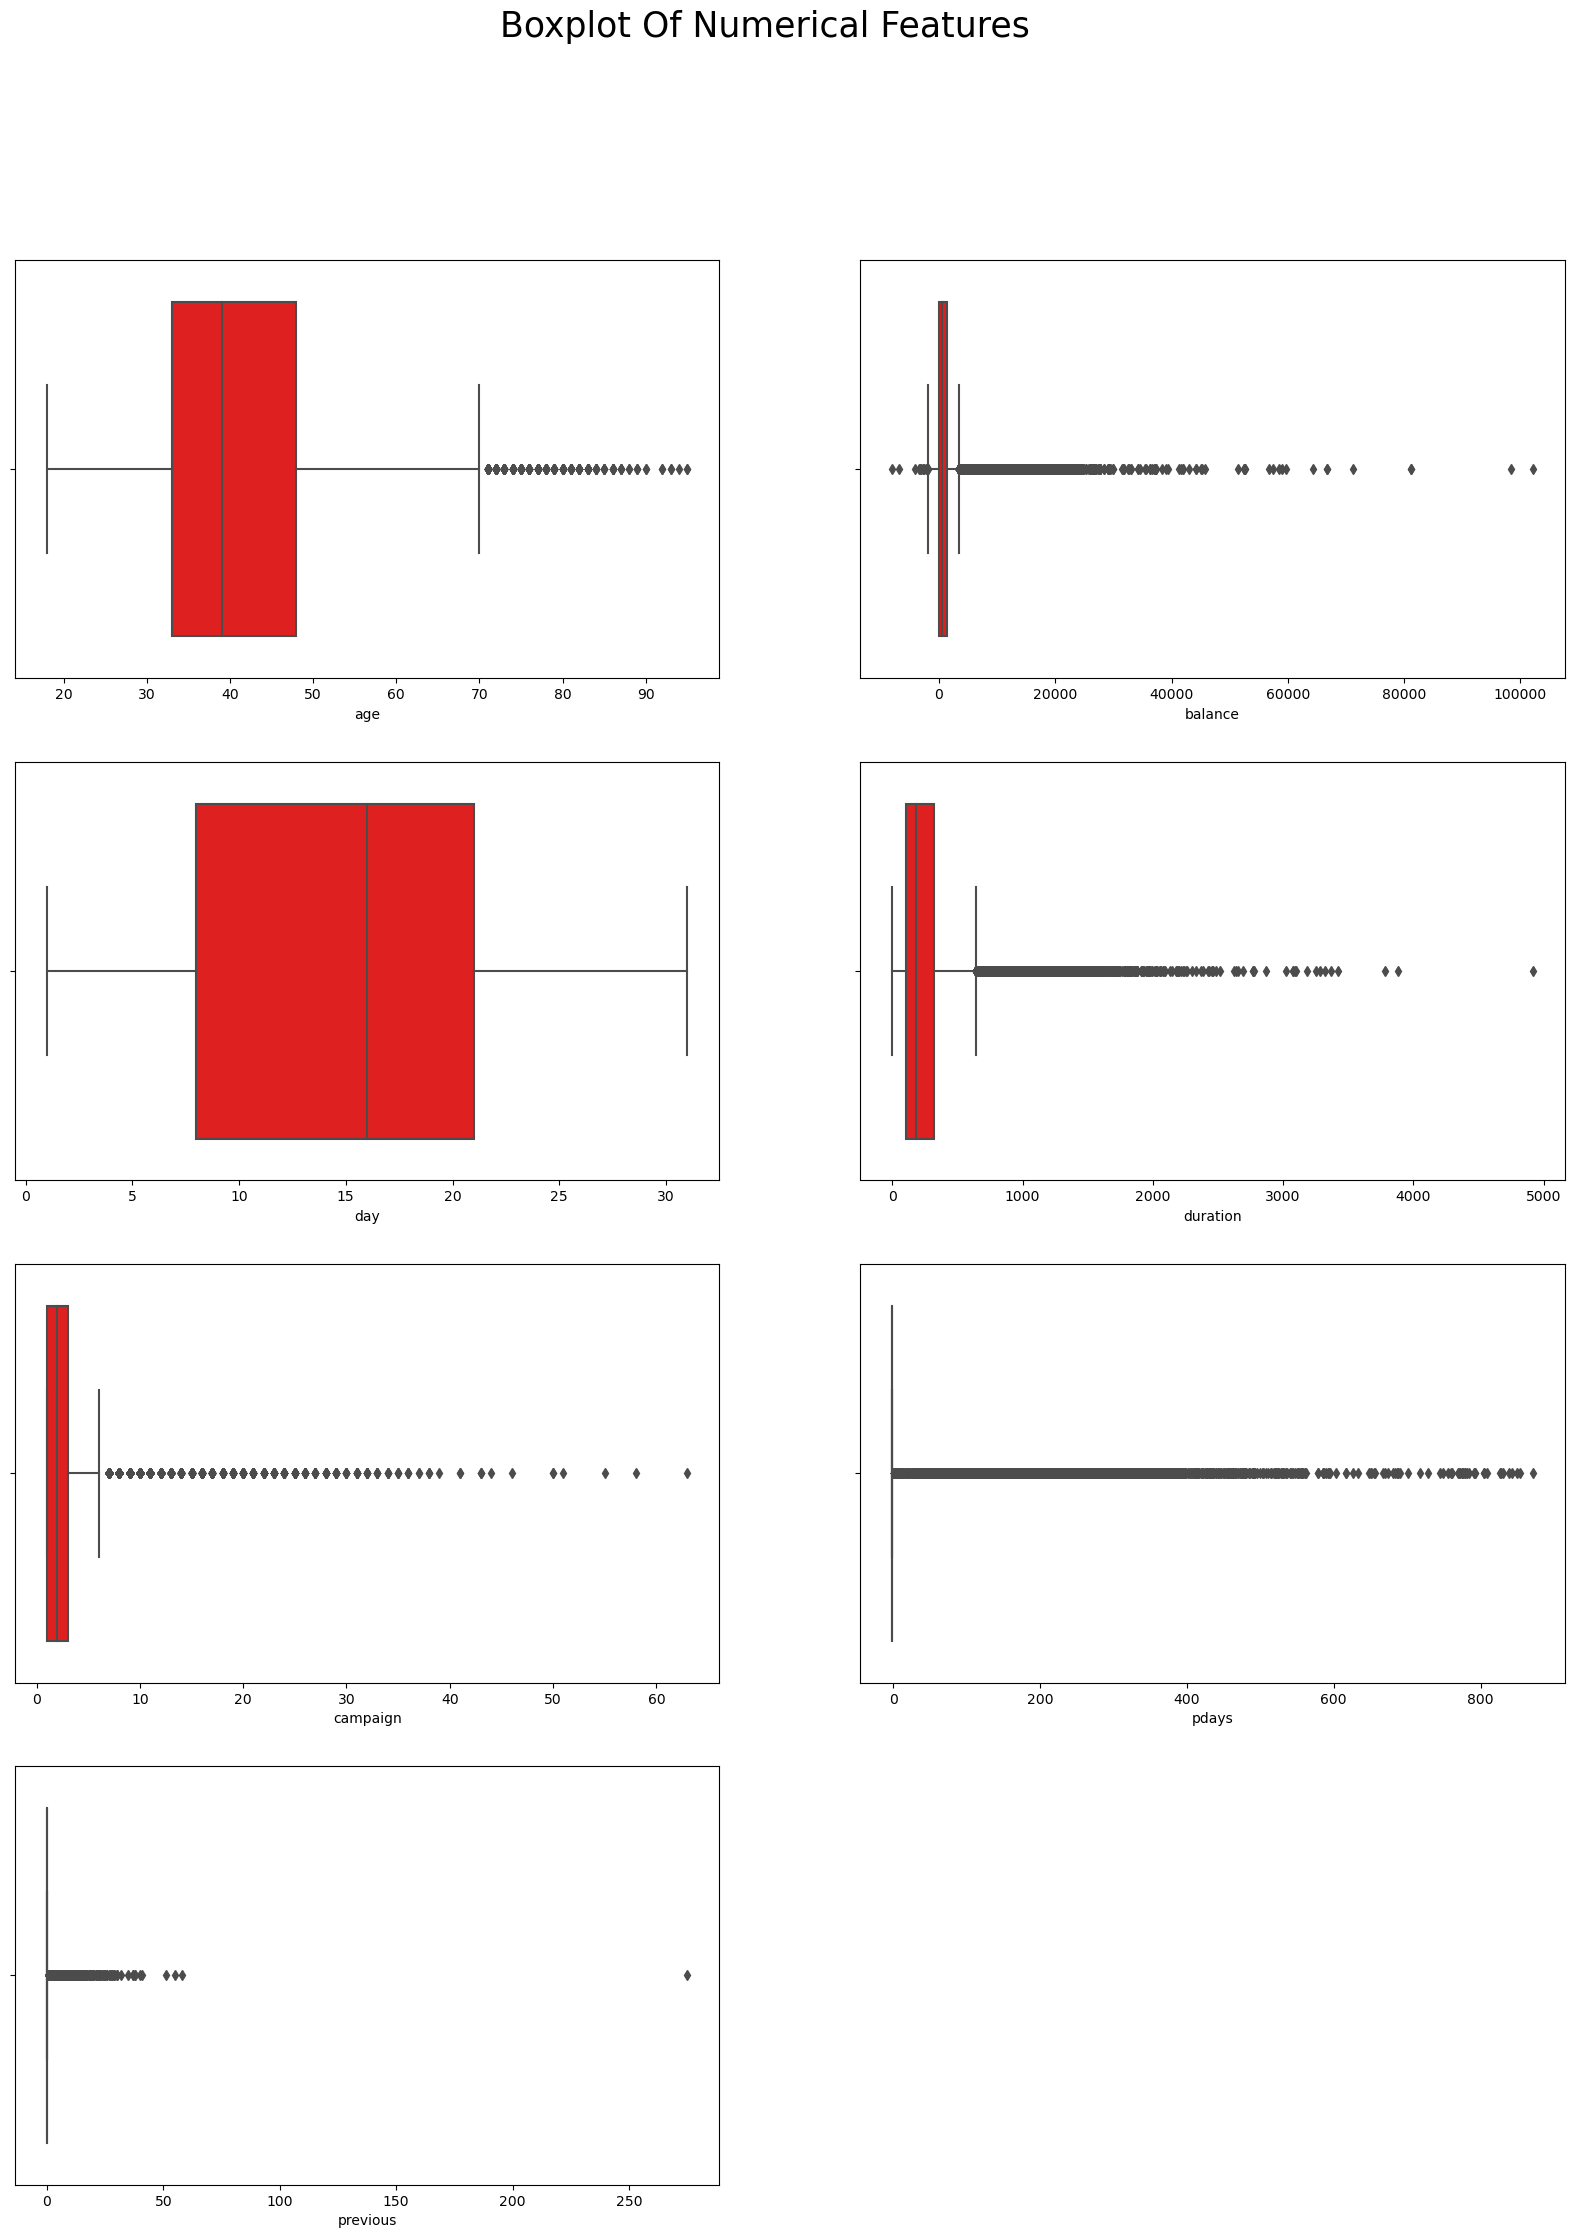

In [22]:
# Boxplot Of Numerical Features.
plt.figure(figsize=(20,25))
for i,col in enumerate(Numerical,1):
    plt.subplot(4,2,i)
    sns.boxplot(df[col], color="r")
    plt.xlabel(col)
plt.suptitle("Boxplot Of Numerical Features", fontsize=25)
plt.show()

- age, balance, duration, compaign, pdays and previous has some outliers.

#### 13. Explore the Correlation between numerical features.

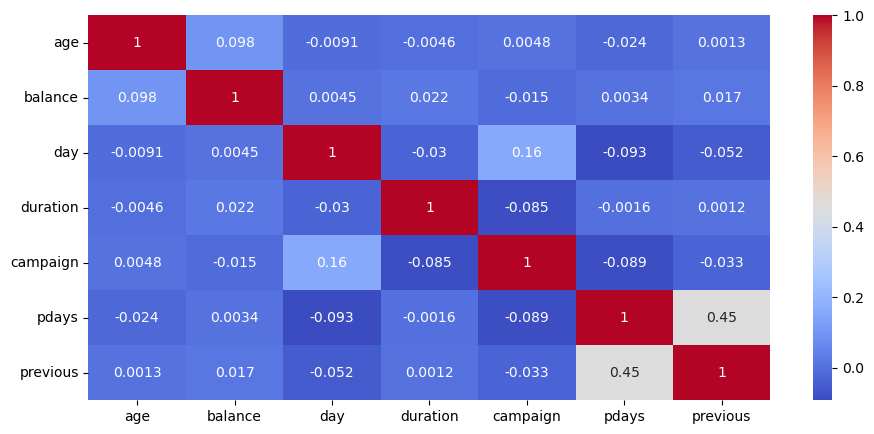

In [23]:
## Checking for correlation
plt.figure(figsize=(11,5))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.coolwarm)
plt.show()

- It seems no feature have strong correlation with other features.(No-Multicolinearity)

#### 14. Check the Data set is balanced or not based on target values in classification.

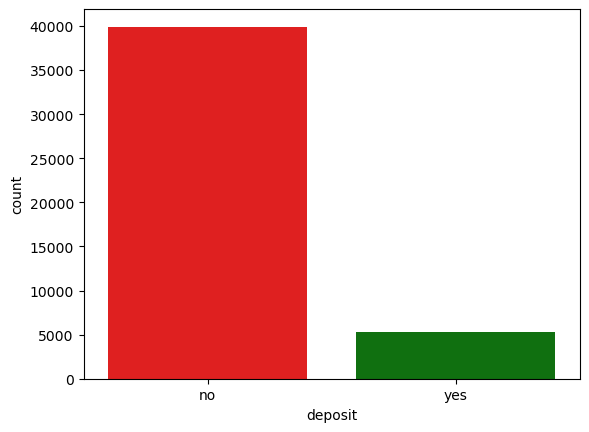

In [24]:
col = ["r","g"]
sns.countplot(df["deposit"],palette=col)
plt.show()

In [25]:
df["deposit"].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

- Given dataset seems to be imbalanced.

## Feature Selection.

#### Encoding The Categorical Features.

In [26]:
df[categorical].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [27]:
le = LabelEncoder()
df["marital"] = le.fit_transform(df["marital"])
df["default"] = le.fit_transform(df["default"])
df["housing"] = le.fit_transform(df["housing"])
df["loan"] = le.fit_transform(df["loan"])
df["contact"] = le.fit_transform(df["contact"])

In [28]:
df = pd.get_dummies(df,columns=["job","education","month","poutcome"],drop_first=False)

In [29]:
df["deposit"] = df["deposit"].replace({"no":0,"yes":1})

- We Are Using Label Encoder Upto 3 Classes In Features.
- And Get_Dummies Encoding  More Than 3 Classes In Feature.
- And Replace Function To Encode Target Variable.

#### Checking Correlation through kendall method.

In [30]:
Continuous

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [31]:
Continuous.append("deposit")

In [32]:
Continuous

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'deposit']

In [33]:
K_corr = df[Continuous].corr(method='kendall').tail(1)
K_corr

,age,balance,day,duration,campaign,pdays,previous,deposit
deposit,-0.007246,0.082138,-0.024566,0.279923,-0.075977,0.147137,0.163155,1.0


<AxesSubplot:>

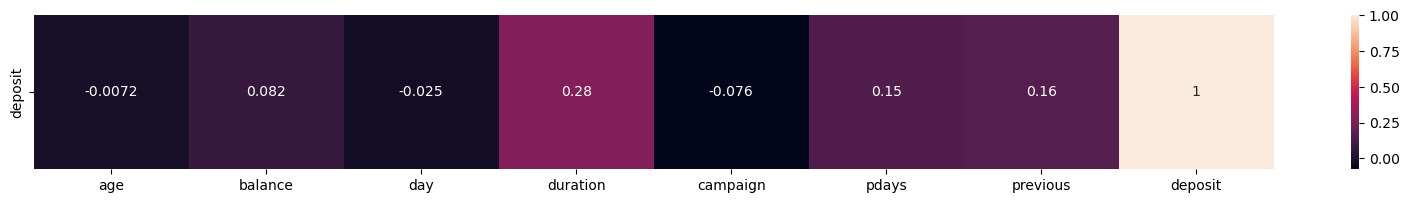

In [34]:
plt.figure(figsize=(20,2))
sns.heatmap(K_corr,annot=True)

In [35]:
Continuous.remove("deposit")

#### Feature Selection Through Chi-Squared Test.

In [36]:
from sklearn.feature_selection import chi2

In [37]:
x_cat = df.drop(["age","balance","day","duration","campaign","pdays","previous","deposit"],axis=1)
y_cat = df[["deposit"]]

Removing Continuous Features and target feature because chi-2 works better on categorical features.

In [38]:
x_scaled = MinMaxScaler().fit_transform(x_cat)

In [39]:
chi_score,p_value = chi2(x_scaled,y_cat)
chi = pd.DataFrame({"chi_value":chi_score,"p_value":p_value},index=x_cat.columns)
chi

,chi_value,p_value
marital,14.883033,1.143872e-04
default,22.313875,2.315277e-06
housing,388.949715,1.401285e-86
loan,176.516137,2.793375e-40
contact,626.907055,2.352400e-138
job_admin.,1.272513,2.592957e-01
job_blue-collar,184.348135,5.446370e-42
job_entrepreneur,16.903979,3.931907e-05
job_housemaid,10.152196,1.441294e-03
job_management,38.743601,4.832919e-10


job_self-employed, job_unknown has low chi-2 value so if we want we can drop them.

#### Feature Selection Through Annova Test.

In [40]:
from sklearn.feature_selection import f_classif

In [41]:
x_num = df[Numerical]
y_num = df["deposit"]

In [42]:
x_num_sc = MinMaxScaler().fit_transform(x_num)

In [43]:
f_score,p_value = f_classif(x_num_sc,y_num)
annova = pd.DataFrame({"f_score":f_score,"p_value":p_value},index=x_num.columns)
annova

,f_score,p_value
age,28.625233,8.825644e-08
balance,126.572276,2.521114e-29
day,36.359010,1.653880e-09
duration,8333.761148,0.000000e+00
campaign,243.358404,1.012347e-54
pdays,490.696563,3.790553e-108
previous,396.443989,7.801830e-88


## Data Preprocessing.

As per Exploratory Data Analysis EDA,

- no missing value found
- no feature found with one value
- defaut features does not play imp role
- it seems some outliers found (age, balance, duration, compaign, pdays and previous has some           outliers)
- Our Dataset Is Imbalanced 

In [44]:
df2=df.copy()

In [45]:
df2.head()

,age,marital,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,1,0,2143,1,0,2,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,2,0,29,1,0,2,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,1,0,2,1,1,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1,0,1506,1,0,2,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,2,0,1,0,0,2,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [46]:
#defaut features does not play imp role
df2.groupby(['deposit','default']).size()

deposit  default
0        0          39159
         1            763
1        0           5237
         1             52
dtype: int64

In [47]:
df2.drop(['default'],axis=1, inplace=True)

In [48]:
df2.groupby(['deposit','pdays']).size()

deposit  pdays
0        -1       33570
          1           9
          2          35
          3           1
          4           1
                  ...  
1         804         1
          805         1
          828         1
          842         1
          854         1
Length: 914, dtype: int64

In [49]:
# drop pdays as it has -1 value for around 40%+ 
df2.drop(['pdays'],axis=1, inplace=True)

#### Outliar Treatment.

In [50]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [51]:
Q1 = df2.age.quantile(0.25)
Q3 = df2.age.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR+9
upper_limit = Q3 + 1.5*IQR+9
lower_limit, upper_limit

(19.5, 79.5)

In [52]:
df2["age"] = np.where(df2["age"]>upper_limit,upper_limit,df2["age"])

In [53]:
# remove outliers in feature balance...
df2.groupby(['deposit','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit.

deposit  balance
0        -8019      1
         -6847      1
         -4057      1
         -3372      1
         -3313      1
                   ..
1         34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 9258, dtype: int64

In [54]:
# remove outliers in feature duration...
df2.groupby(['deposit','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

deposit  duration
0        0            3
         1            2
         2            3
         3            4
         4           15
                     ..
1        3094         1
         3102         1
         3183         1
         3253         1
         3881         1
Name: duration, Length: 2627, dtype: int64

## Split Dataset Into Training Set And Testing Set.

In [55]:
X = df2.drop(["deposit"],axis=1)
Y = df2["deposit"]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42, stratify=Y)

#### Handeling Imbalanced Data.

In [56]:
import imblearn
from imblearn.over_sampling import SMOTE

In [57]:
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x_train,y_train)

- The target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for undersampling and       oversampling the majority and minority classes in the target respectively
- Kindly note that SMOTE should always be applied only on the training data and not on the validation   and test data.

#### Normalizing Data.

In [58]:
sc = StandardScaler()

x_smote = sc.fit_transform(x_smote)

x_test = sc.fit_transform (x_test)

## Model Selection.

#### Importing Required Libraries.

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score

#### Creating Instance Of Models.

In [60]:
Logi = LogisticRegression()
knn= KNeighborsClassifier(n_neighbors=40)
tree= DecisionTreeClassifier(random_state=24) 
forest= RandomForestClassifier(random_state=24)
svm= SVC(random_state=24)
ada = AdaBoostClassifier(random_state=42)
grad = GradientBoostingClassifier()
xboost= XGBClassifier(random_state=24)

In [61]:
# now, create a list with the objects 
models= [Logi, knn, tree, forest, ada, grad, xboost]

#### Fitting Data And Evaluating Models.

In [62]:
acc_scores = []
f1_scores = []
auc_score = []

LogisticRegression()

Training Accuracy :0.94
Accuracy :0.12
AUC :0.50
Recall :1.00
Precision :0.12
F1 :0.21


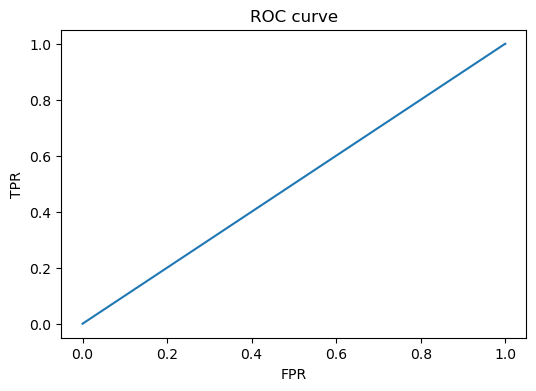

********************************************************************************
KNeighborsClassifier(n_neighbors=40)

Training Accuracy :0.93
Accuracy :0.88
AUC :0.71
Recall :0.48
Precision :0.50
F1 :0.49


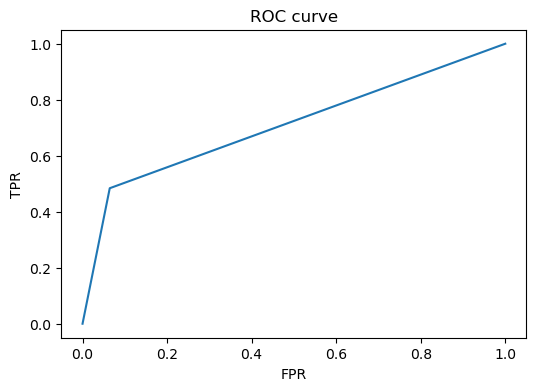

********************************************************************************
DecisionTreeClassifier(random_state=24)

Training Accuracy :1.00
Accuracy :0.83
AUC :0.72
Recall :0.58
Precision :0.35
F1 :0.44


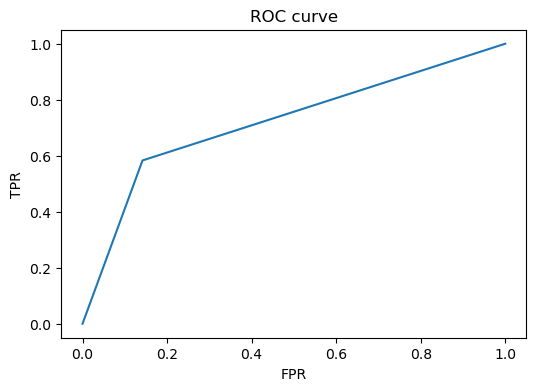

********************************************************************************
RandomForestClassifier(random_state=24)

Training Accuracy :1.00
Accuracy :0.89
AUC :0.77
Recall :0.61
Precision :0.51
F1 :0.56


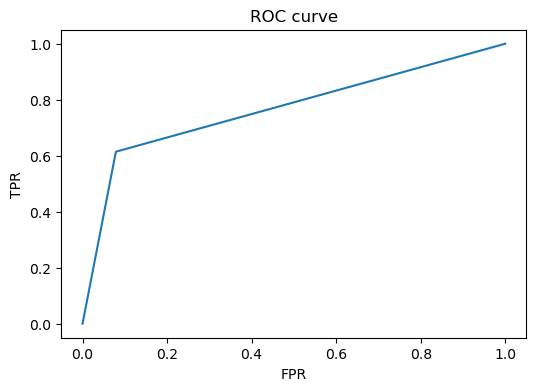

********************************************************************************
AdaBoostClassifier(random_state=42)

Training Accuracy :0.93
Accuracy :0.86
AUC :0.79
Recall :0.69
Precision :0.44
F1 :0.53


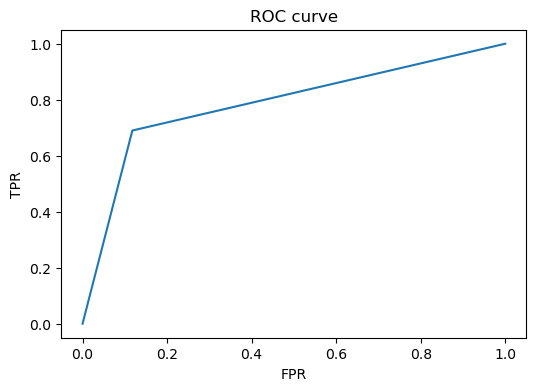

********************************************************************************
GradientBoostingClassifier()

Training Accuracy :0.94
Accuracy :0.87
AUC :0.82
Recall :0.76
Precision :0.46
F1 :0.57


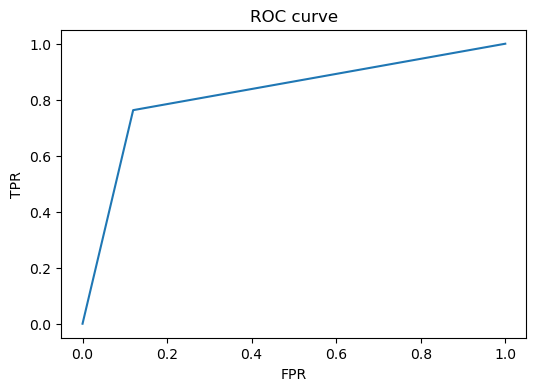

********************************************************************************
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=24, ...)

Training Accuracy :0.97
Accuracy :0.88
AUC :0.80
Recall :0.71
Precision :0.48
F1 :0.57


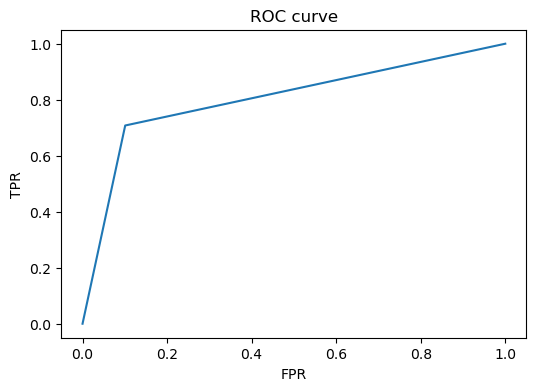

********************************************************************************


In [63]:
for model in models:
    model.fit(x_smote, y_smote) 
    train_acc = model.score(x_smote, y_smote)
    y_pred= model.predict(x_test) 
    
    auc = roc_auc_score(y_test, y_pred)
    auc_score.append(auc)
    
    accuracy = accuracy_score(y_test,y_pred)
    acc_scores.append(accuracy)
    
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    f1_scores.append(f1)
    print(model)
    print()
    print("Training Accuracy :%.2f"%train_acc)
    print('Accuracy :%.2f'%accuracy)
    print('AUC :%.2f'%auc)
    print('Recall :%.2f'%recall)
    print('Precision :%.2f'%precision)
    print('F1 :%.2f'%f1)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(6,4))
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    print("*"*80)

In [64]:
acc_scores

[0.11710715470529691,
 0.8827822625234988,
 0.8259427181245163,
 0.8852150834899922,
 0.8596704633418113,
 0.8665265951564746,
 0.8767002101072653]

In [65]:
auc_score

[0.5000626174076392,
 0.7097806260083592,
 0.7206423788459695,
 0.7677343980265454,
 0.7860675676155552,
 0.8215177204896232,
 0.8035001236960132]

In [66]:
f1_scores

[0.20950495049504952,
 0.491362763915547,
 0.4394586894586895,
 0.5560307955517536,
 0.5349945034811286,
 0.5721375398794754,
 0.5732874091083047]

In [67]:
clf_models= ["LogisticRegression", "knn", "Decision Tree", "Random Forest", "Adaboost",
         "GradientBoost", "XGBoost"]

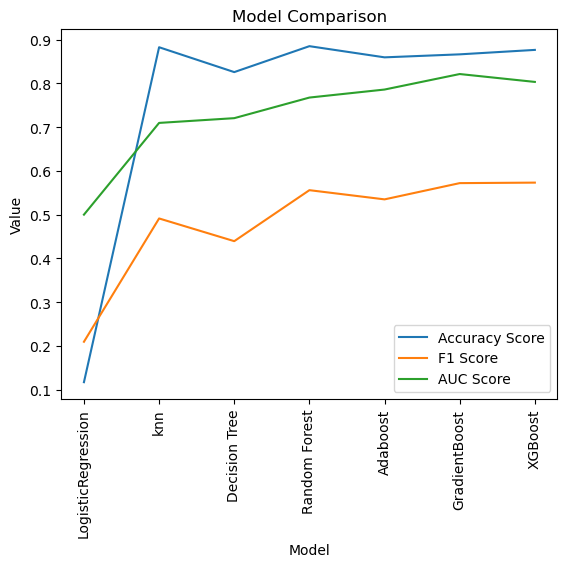

In [68]:
plt.plot(clf_models,acc_scores,label='Accuracy Score')
plt.plot(clf_models,f1_scores,label='F1 Score')
plt.plot(clf_models,auc_score,label='AUC Score')
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Model Comparison')
plt.legend()
plt.xticks(rotation=90);

### Feature Selection Methods.

#### Feature importance Through RandomForest.

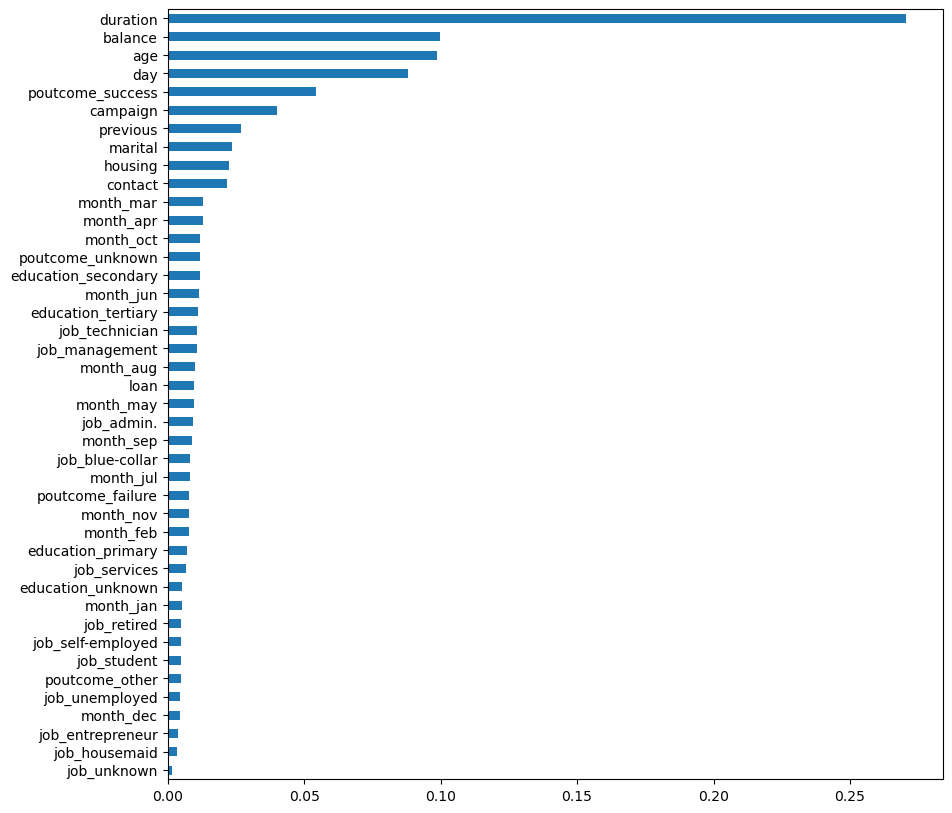

In [69]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# selecting the data
rfc = RandomForestClassifier(random_state=42)
# fitting the data
rfc.fit(X_train, y_train)
# predicting the data
y_pred = rfc.predict(X_test)
# feature importances
rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values()
# plotting bar chart according to feature importance
plt.figure(figsize=(10,10))
rfc_importances.plot(kind='barh')
plt.show()

#### Feature importance Through XGBoost.

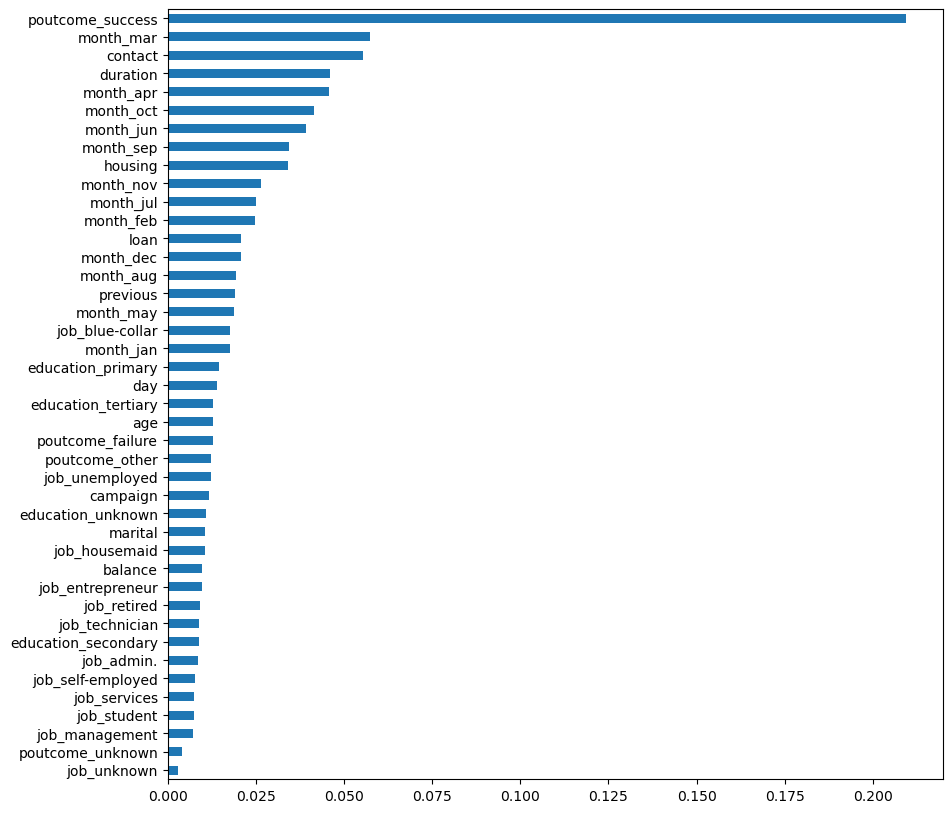

In [70]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# selecting the data
xgb_mod = XGBClassifier(random_state=42)
# fitting the data
xgb_mod.fit(X_train, y_train)
# predicting the data
y_pred = xgb_mod.predict(X_test)
# feature importances
xgb_importances = pd.Series(xgb_mod.feature_importances_, index=X.columns).sort_values()
# plotting bar chart according to feature importance
plt.figure(figsize=(10,10))
xgb_importances.plot(kind='barh')
plt.show()

#### Feature Importance Through Gradient Boosting.

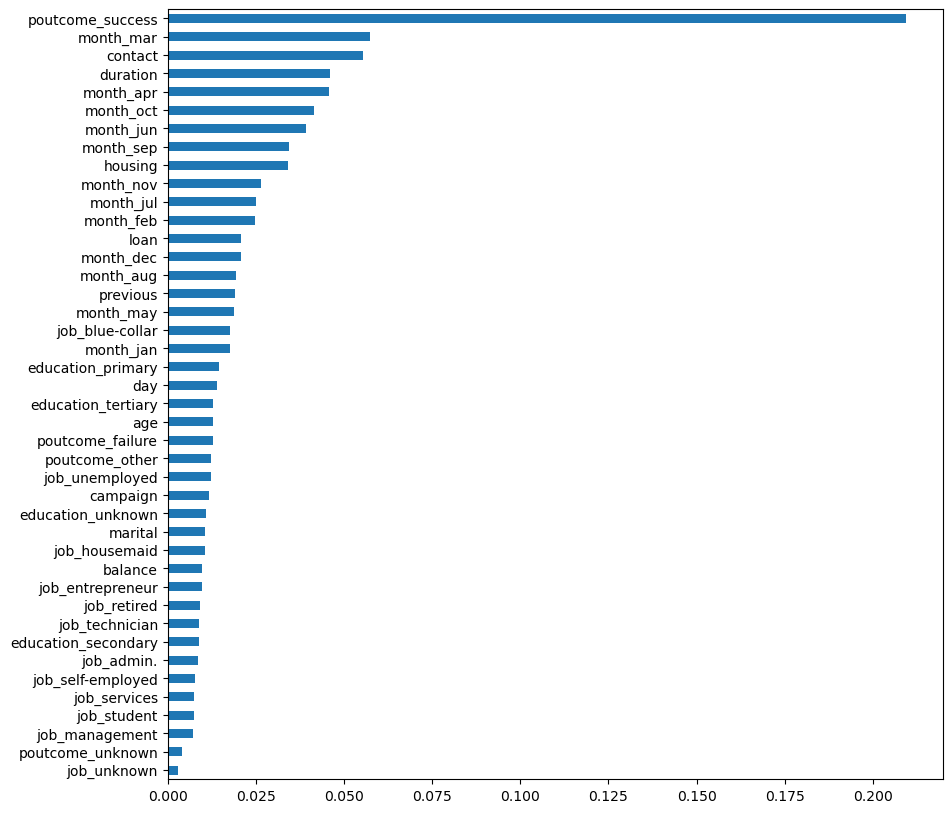

In [71]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# selecting the data
gb_mod = GradientBoostingClassifier(random_state=42)
# fitting the data
gb_mod.fit(X_train, y_train)
# predicting the data
y_pred = xgb_mod.predict(X_test)
# feature importances
gb_importances = pd.Series(xgb_mod.feature_importances_, index=X.columns).sort_values()
# plotting bar chart according to feature importance
plt.figure(figsize=(10,10))
gb_importances.plot(kind='barh')
plt.show()

## Hyperparameter Tunning.

#### Hyperparameter tunning through Random Forest.

In [96]:
# splitting the data
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42, stratify=Y)
# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter

params = {'n_estimators':np.arange(10,15),
         'criterion': ['gini','entropy'],
         'max_depth':np.arange(2,15),
         'min_samples_leaf':np.arange(1,6),
         'min_samples_split':np.arange(2,7),
         'max_features':['auto'],
         'random_state':[10]
         }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=params)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 14, 'random_state': 10}


Training Accuracy :0.96
Accuracy :0.90
AUC :0.75
Recall :0.57
Precision :0.56
F1 :0.56


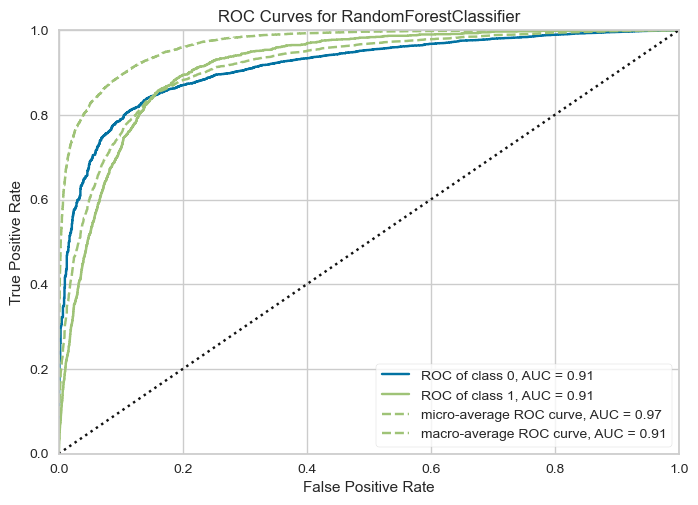

In [79]:
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import roc_auc

    
# splitting the data
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
    
# Applying Smote on train data for dealing with class imbalance
smote = SMOTE()
        
X_sm, y_sm =  smote.fit_resample(x_train, y_train)
    
rfc = RandomForestClassifier(n_estimators = 14,
                             criterion = 'gini',
                             max_depth = 14,
                             min_samples_leaf = 1,
                             min_samples_split = 5,
                             max_features = 'auto',
                             random_state = 10
                             )
    
rfc.fit(X_sm, y_sm)
train_acc_rf = rfc.score(X_sm, y_sm)
y_pred = rfc.predict(x_test)
auc_rf = roc_auc_score(y_test, y_pred)
acc_rf = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1_rf = f1_score(y_test,y_pred)

print("Training Accuracy :%.2f"%train_acc_rf)
print('Accuracy :%.2f'%acc_rf)
print('AUC :%.2f'%auc_rf)
print('Recall :%.2f'%recall)
print('Precision :%.2f'%precision)
print('F1 :%.2f'%f1_rf)
visualizer = roc_auc(rfc,X_sm,y_sm,x_test,y_test)

#### Hyperparameter tunning through Gradint Bossting.

In [114]:
# splitting the data
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42, stratify=Y)
# selecting the classifier
gbc = GradientBoostingClassifier()
# selecting the parameter

# Applying Smote on train data for dealing with class imbalance
smote = SMOTE()
        
X_sm, y_sm =  smote.fit_resample(x_train, y_train)

params = {'n_estimators':range(50,200,50),
         'max_depth':range(1,5,1),
         'learning_rate':[0.001,0.01,0.1]
         }
# using grid search with respective parameters
random_search_model = RandomizedSearchCV(estimator=gbc, param_distributions=params,n_iter=20,cv=2,random_state=42)
# fitting the model
random_search_model.fit(X_sm, y_sm)
# printing the best parameters
print('Best Parameters are:',random_search_model.best_params_)

Best Parameters are: {'n_estimators': 150, 'max_depth': 2, 'learning_rate': 0.1}


Training Accuracy :0.94
Accuracy :0.90
AUC :0.76
Recall :0.59
Precision :0.57
F1 :0.58


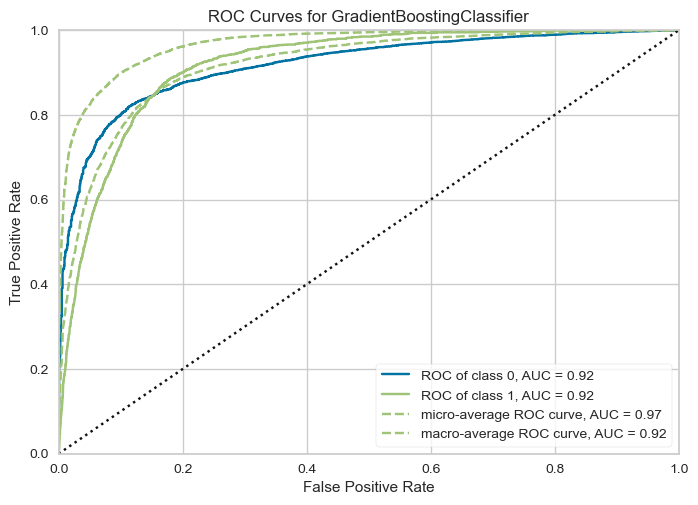

In [80]:
# splitting the data
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
    
# Applying Smote on train data for dealing with class imbalance
smote = SMOTE()
        
X_sm, y_sm =  smote.fit_resample(x_train, y_train)
    
gbc = GradientBoostingClassifier(n_estimators = 150,max_depth = 2, learning_rate=0.1,
                                     random_state=42)
                                    
gbc.fit(X_sm, y_sm)
train_acc_gbc = gbc.score(X_sm, y_sm)
y_pred = gbc.predict(x_test)
auc_gbc = roc_auc_score(y_test, y_pred)
acc_gbc = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1_gbc = f1_score(y_test,y_pred)
print("Training Accuracy :%.2f"%train_acc_gbc)
print('Accuracy :%.2f'%acc_gbc)
print('AUC :%.2f'%auc_gbc)
print('Recall :%.2f'%recall)
print('Precision :%.2f'%precision)
print('F1 :%.2f'%f1_gbc)
visualizer = roc_auc(gbc,X_sm,y_sm,x_test,y_test)

### Ensembling.

Ensemble learning uses multiple machine learning models to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. In the below task, we have used an ensemble of three models - RandomForestClassifier(), GradientBoostingClassifier(), LogisticRegression(). 

In [75]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

Training Accuracy :0.96
Accuracy :0.90
AUC :0.76
Recall :0.59
Precision :0.57
F1 :0.58


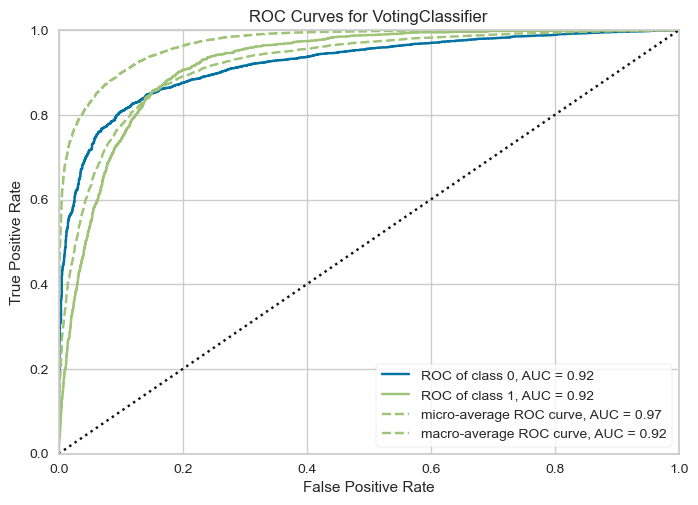

In [81]:
# splitting the data  
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# using smote
smote = SMOTE()
X_sm, y_sm =  smote.fit_resample(x_train, y_train)
# models to use for ensembling  
model1 = RandomForestClassifier()
model3 = GradientBoostingClassifier()
model2 = LogisticRegression()
# fitting the model
model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('xgb',model3)], voting='soft')
model.fit(X_sm,y_sm)
# predicting balues and getting the metrics
y_pred = model.predict(x_test)
train_ensemble = model.score(X_sm, y_sm)
auc_ensemble = roc_auc_score(y_test, y_pred)
acc_ensemble = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1_ensemble = f1_score(y_test,y_pred)

print("Training Accuracy :%.2f"%train_ensemble)
print('Accuracy :%.2f'%acc_ensemble)
print('AUC :%.2f'%auc_ensemble)
print('Recall :%.2f'%recall)
print('Precision :%.2f'%precision)
print('F1 :%.2f'%f1_ensemble)
visualizer = roc_auc(model,X_sm,y_sm,x_test,y_test)

#### Final Model Evaluation.

In [82]:
final_models = ["Optimized Random Forest", "Optimized Gradient Boost", "Ensembling"]
final_acc = [acc_rf,acc_gbc,acc_ensemble]
final_train_acc = [train_acc_rf,train_acc_gbc,train_ensemble]
final_auc = [auc_rf,auc_gbc,auc_ensemble]
final_f1 = [f1_rf,f1_gbc,f1_ensemble]

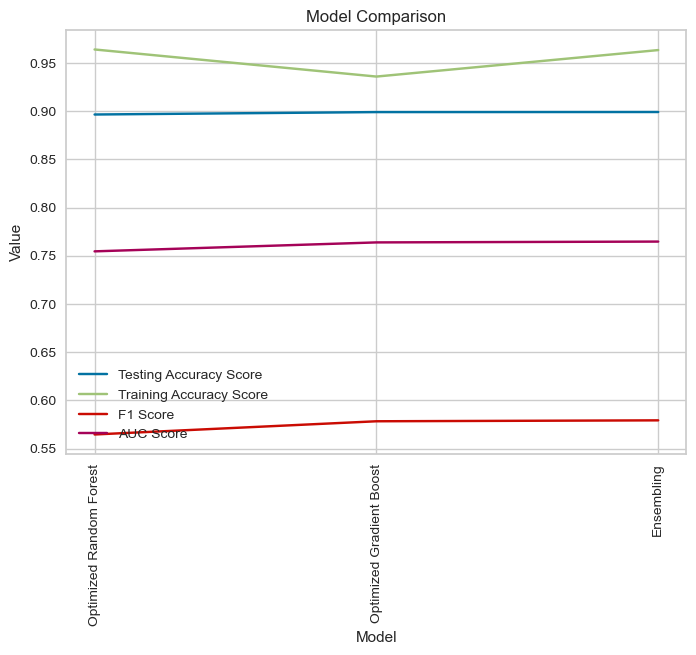

In [83]:
plt.plot(final_models,final_acc,label='Testing Accuracy Score')
plt.plot(final_models,final_train_acc,label='Training Accuracy Score')
plt.plot(final_models,final_f1,label='F1 Score')
plt.plot(final_models,final_auc,label='AUC Score')
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Model Comparison')
plt.legend()
plt.xticks(rotation=90);

#### model Selection for Pickle.

From Above models we are choosing GradientBoostingClassifier because it reduces overfitting better then other model and it has better auc.

In [72]:
import pickle

In [73]:
pickle.dump(gbc, open('Gradient_Boosting.pickle', 'wb'))

### Conclusion.

Through this project, we created a machine learning model that is able to predict how likely clients will subscribe to a bank term deposit. The best model was gradient boosting classifier with optimized hyperparameters.

We should focus on targeting customers with high duration and poutcome_success as they are high importance features for the model and business.

Therefore, we save time and money knowing the characteristics of clients we should market to and that will lead to increased growth and revenue.